## Hola soy un notebook de python de práctica

In [55]:
%matplotlib inline

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as ppr
import seaborn as sns

In [57]:
## Leemos los datos seleccionados
df_main = pd.read_csv('../data/TB_HOSP_VAC_FALLECIDOS.csv')
df_oxigen = pd.read_csv('../data/Oxigeno_25-10-2021.csv', sep="|")
df_camas = pd.read_csv('../data/Camas-08_03_2022.csv', sep="|")

In [58]:
# Validar integridad del identificador único
len(df_main['id_persona'].unique()), df_main.shape[0]

(135958, 136422)

In [59]:
df_main['id_persona'].isna().sum()

0

In [60]:
## conteo de cuantas veces se duplica los id_persona
filtro_duplicados = df_main['id_persona'].duplicated(keep=False)
df_main[filtro_duplicados]['id_persona'].value_counts().head()

26422634    3
6054506     3
29048330    3
17656119    2
21125968    2
Name: id_persona, dtype: int64

In [61]:
# TODO: Crear variable si fue reinfeccion (0, 1)
# TODO: Crear variable si con el # de la reinfeccion (1, 2, 3, etc)

In [62]:
## Número de valores perdidos
edad_na_count = df_main['edad'].isna().sum()
print(edad_na_count)
print(round(edad_na_count / df_main.shape[0] * 100, 2), '%')

7843
5.75 %


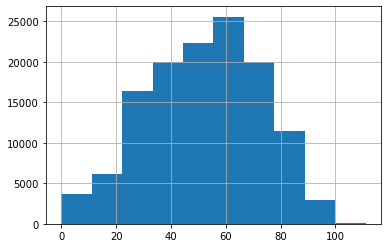

In [63]:
df_main['edad'].hist()
plt.show()

In [64]:
df_main["edad"].describe()

count    128579.000000
mean         52.179446
std          20.436026
min           0.000000
25%          37.000000
50%          54.000000
75%          68.000000
max         111.000000
Name: edad, dtype: float64

In [65]:
counts, bins = np.histogram(df_main["edad"].dropna().values,bins = 7)
bins

array([  0.        ,  15.85714286,  31.71428571,  47.57142857,
        63.42857143,  79.28571429,  95.14285714, 111.        ])

In [66]:
edad_bins = pd.cut(df_main["edad"], bins = [0,5,13,18,25,40,55,65,80,95,112])

edad_bins_counts = edad_bins.value_counts()

edad_bins_counts


(40, 55]     29595
(65, 80]     26201
(25, 40]     25404
(55, 65]     23376
(80, 95]      9954
(18, 25]      7492
(5, 13]       2197
(13, 18]      1938
(0, 5]        1926
(95, 112]      451
Name: edad, dtype: int64

In [ ]:
df_main["edad_bins"] = edad_bins

In [ ]:
df_main["sexo"].isna().sum() / df_main.shape[0]

0.05013854070457844

In [ ]:
df_main["sexo"].value_counts(), df_main["sexo"].value_counts(normalize= True)

(M    69149
 F    60433
 Name: sexo, dtype: int64,
 M    0.533631
 F    0.466369
 Name: sexo, dtype: float64)

In [ ]:
conteo_edad_x_sexo = (df_main[["edad_bins","sexo"]].dropna() ## selecion de columns y elimino NaNs
                    .groupby(["edad_bins","sexo"]).size() )# agrupo y cuento las obs. por intervalo de edad y sexo

conteo_edad_x_sexo


edad_bins  sexo
(0, 5]     F         850
           M        1076
(5, 13]    F         927
           M        1270
(13, 18]   F        1310
           M         628
(18, 25]   F        5866
           M        1597
(25, 40]   F       15891
           M        9303
(40, 55]   F       11255
           M       18232
(55, 65]   F        8820
           M       14509
(65, 80]   F       10327
           M       15849
(80, 95]   F        4383
           M        5567
(95, 112]  F         242
           M         209
dtype: int64

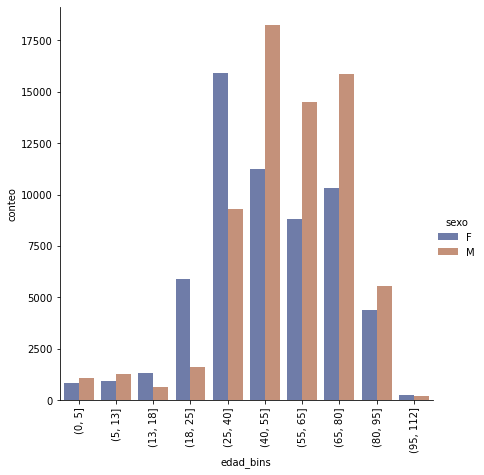

In [ ]:
## gráfica de barras de cantidad de personas por intervalo de edad por género

g = sns.catplot(
    data=conteo_edad_x_sexo.reset_index().rename(columns={0: "conteo"}),
     kind="bar",
    x="edad_bins", y="conteo", hue="sexo",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.set_xticklabels(rotation = 90)

In [ ]:
geo_vars = ['ubigeo_inei_domicilio', 'dep_domicilio', 'prov_domicilio',
       'dist_domicilio']
df_main[geo_vars].isna().sum()

ubigeo_inei_domicilio    0
dep_domicilio            0
prov_domicilio           0
dist_domicilio           0
dtype: int64

In [ ]:
df_main['ubigeo_inei_domicilio'] = df_main['ubigeo_inei_domicilio'].astype(str)

In [69]:
df_main[geo_vars].dtypes

ubigeo_inei_domicilio    object
dep_domicilio            object
prov_domicilio           object
dist_domicilio           object
dtype: object

In [70]:
df_main[geo_vars].describe()

,ubigeo_inei_domicilio,dep_domicilio,prov_domicilio,dist_domicilio
count,136422,136422,136422,136422
unique,1716,25,196,1580
top,150142,LIMA,LIMA,VILLA EL SALVADOR
freq,7156,50719,46309,7156
